In [3]:
# H0: существенной разницы между рейтингами нет
# H1: существенная разница между рейтингами есть

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome
from time import sleep
import seaborn as sb
from scipy import stats

In [18]:
browser = Chrome('/usr/local/bin/chromedriver')

/tmp/ipykernel_16361/1255118660.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = Chrome('/usr/local/bin/chromedriver')


In [19]:
browser.get('https://www.kinopoisk.ru/lists/movies/top250/')

In [20]:
html_text = browser.page_source

In [22]:
soup = BeautifulSoup(html_text, 'lxml')

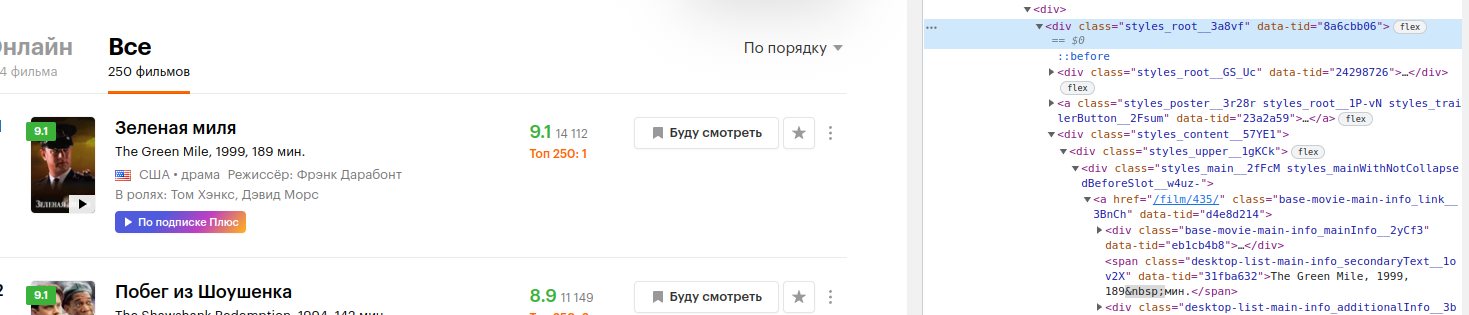

In [24]:
soup.find('div', class_='styles_root__3a8vf').find('div', class_='styles_kinopoisk__3rMPX').find('span', class_='styles_kinopoiskCount__1DPG7').text

'14 090'

In [30]:
browser = Chrome('/usr/local/bin/chromedriver')


/tmp/ipykernel_4692/1694208490.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = Chrome('/usr/local/bin/chromedriver')


In [2]:
# Название фильма ==== russian_name
# Рейтинг кинопоиска на картинке ==== rate_image
# Ссылка на фильм ==== link_film
# Количество голосов для рейтинга кинопоиска за все время ==== total_voices
# Рейтинг перерасчитанный кинопоиска ==== rate_per_year
# Количество голосов для перерасчитанного рейтинга за год ==== voices_per_year


In [1]:
new_data = [] # данные
all_link = []
for i in range(1, 6):
    url_page = f'https://www.kinopoisk.ru/lists/movies/top250/?page={i}'
    browser.get(url_page)
    
    sleep(25)
    
    html_text = browser.page_source
    soup = BeautifulSoup(html_text, 'lxml')

    

    for film in films:
        link_film = 'https://www.kinopoisk.ru' +  film.find('div', class_='styles_upper__1gKCk').find('div', class_='styles_main__2fFcM styles_mainWithNotCollapsedBeforeSlot__w4uz-').find('a', class_='base-movie-main-info_link__3BnCh').get('href')
        all_link.append(link_film)
        russian_name = film.find('div', class_='styles_upper__1gKCk').find('div', class_='styles_main__2fFcM styles_mainWithNotCollapsedBeforeSlot__w4uz-').find('a', class_='base-movie-main-info_link__3BnCh').find('div', class_='base-movie-main-info_mainInfo__2yCf3').text
        rate_image = film.find('a', class_='styles_poster__3r28r styles_root__1P-vN styles_trailerButton__2Fsum').text
        rate_per_year = film.find('div', class_='styles_kinopoisk__3rMPX').find('span', class_='styles_kinopoiskValuePositive__1G4F6 styles_kinopoiskValue__2oNdS').text
        voices_per_year = film.find('div', class_='styles_kinopoisk__3rMPX').find('span', class_='styles_kinopoiskCount__1DPG7').text
    
        new_data.append([russian_name, rate_image, voices_per_year, rate_per_year])
        


NameError: name 'browser' is not defined

In [32]:
len(new_data)

250

In [33]:
len(all_link)

250

In [48]:
all_link

['https://www.kinopoisk.ru/film/435/',
 'https://www.kinopoisk.ru/film/326/',
 'https://www.kinopoisk.ru/film/329/',
 'https://www.kinopoisk.ru/film/3498/',
 'https://www.kinopoisk.ru/film/312/',
 'https://www.kinopoisk.ru/film/448/',
 'https://www.kinopoisk.ru/film/328/',
 'https://www.kinopoisk.ru/film/535341/',
 'https://www.kinopoisk.ru/film/342/',
 'https://www.kinopoisk.ru/film/2360/',
 'https://www.kinopoisk.ru/film/42664/',
 'https://www.kinopoisk.ru/film/258687/',
 'https://www.kinopoisk.ru/film/679486/',
 'https://www.kinopoisk.ru/film/476/',
 'https://www.kinopoisk.ru/film/279102/',
 'https://www.kinopoisk.ru/film/447301/',
 'https://www.kinopoisk.ru/film/111543/',
 'https://www.kinopoisk.ru/film/361/',
 'https://www.kinopoisk.ru/film/522/',
 'https://www.kinopoisk.ru/film/370/',
 'https://www.kinopoisk.ru/film/32898/',
 'https://www.kinopoisk.ru/film/46708/',
 'https://www.kinopoisk.ru/film/474/',
 'https://www.kinopoisk.ru/film/301/',
 'https://www.kinopoisk.ru/film/44386/

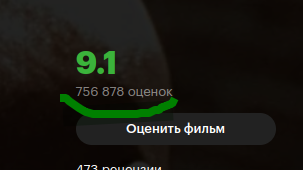

In [50]:
browser = Chrome('/usr/local/bin/chromedriver')


/tmp/ipykernel_16361/1694208490.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = Chrome('/usr/local/bin/chromedriver')


In [67]:
list_total_voice = []

for link in all_link:
    browser.get(link)
    total_voices = browser.find_element_by_class_name('styles_countBlock__2kmBI').find_element_by_class_name('styles_count__21aGU').text
    total_voices
    list_total_voice.append(total_voices)
    sleep(5)
    
    

/tmp/ipykernel_16361/340457387.py:5: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  total_voices = browser.find_element_by_class_name('styles_countBlock__2kmBI').find_element_by_class_name('styles_count__21aGU').text


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".styles_countBlock__2kmBI"}
  (Session info: chrome=100.0.4896.75)
Stacktrace:
#0 0x5625a9f77ad3 <unknown>
#1 0x5625a9cd7568 <unknown>
#2 0x5625a9d0dc46 <unknown>
#3 0x5625a9d0de01 <unknown>
#4 0x5625a9d40a64 <unknown>
#5 0x5625a9d2b61d <unknown>
#6 0x5625a9d3e824 <unknown>
#7 0x5625a9d2b4e3 <unknown>
#8 0x5625a9d00d1a <unknown>
#9 0x5625a9d01e75 <unknown>
#10 0x5625a9fa5efd <unknown>
#11 0x5625a9fbf19b <unknown>
#12 0x5625a9fa7c65 <unknown>
#13 0x5625a9fbfec8 <unknown>
#14 0x5625a9f9b360 <unknown>
#15 0x5625a9fdba68 <unknown>
#16 0x5625a9fdbbe8 <unknown>
#17 0x5625a9ff57fd <unknown>
#18 0x7ffa0c0c0947 <unknown>


In [66]:
browser.get('https://www.kinopoisk.ru/film/448/')
total_voices = browser.find_element_by_class_name('styles_countBlock__2kmBI').find_element_by_class_name('styles_count__21aGU').text
total_voices



/tmp/ipykernel_16361/901056597.py:2: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  total_voices = browser.find_element_by_class_name('styles_countBlock__2kmBI').find_element_by_class_name('styles_count__21aGU').text


'692 724 оценки'

In [76]:
all_link[138]

'https://www.kinopoisk.ru/film/349/'

In [70]:
list_total_voice_2 = []

for link in all_link[138:]:
    browser.get(link)
    total_voices = browser.find_element_by_class_name('styles_countBlock__2kmBI').find_element_by_class_name('styles_count__21aGU').text
    total_voices
    list_total_voice_2.append(total_voices)
    sleep(5)
    

/tmp/ipykernel_16361/2516255720.py:5: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  total_voices = browser.find_element_by_class_name('styles_countBlock__2kmBI').find_element_by_class_name('styles_count__21aGU').text


In [9]:
list_total_voice = ['756 086 оценок',
 '823 914 оценок',
 '406 934 оценки',
 '514 349 оценок',
 '506 525 оценок',
 '692 724 оценки',
 '563 999 оценок',
 '1 393 777 оценок',
 '585 626 оценок',
 '572 277 оценок',
 '754 707 оценок',
 '772 362 оценки',
 '489 883 оценки',
 '522 736 оценок',
 '532 163 оценки',
 '851 349 оценок',
 '586 802 оценки',
 '658 746 оценок',
 '448 432 оценки',
 '429 739 оценок',
 '497 494 оценки',
 '458 621 оценка',
 '532 907 оценок',
 '627 506 оценок',
 '538 800 оценок',
 '179 265 оценок',
 '114 749 оценок',
 '497 548 оценок',
 '207 253 оценки',
 '820 298 оценок',
 '677 932 оценки',
 '649 754 оценки',
 '418 606 оценок',
 '1 005 719 оценок',
 '507 538 оценок',
 '377 460 оценок',
 '674 756 оценок',
 '498 926 оценок',
 '326 221 оценка',
 '137 312 оценок',
 '688 318 оценок',
 '287 762 оценки',
 '689 121 оценка',
 '637 206 оценок',
 '151 031 оценка',
 '219 895 оценок',
 '529 208 оценок',
 '547 298 оценок',
 '750 396 оценок',
 '239 462 оценки',
 '306 955 оценок',
 '362 838 оценок',
 '382 045 оценок',
 '651 505 оценок',
 '436 477 оценок',
 '261 467 оценок',
 '276 293 оценки',
 '410 365 оценок',
 '113 531 оценка',
 '301 149 оценок',
 '404 023 оценки',
 '543 259 оценок',
 '384 723 оценки',
 '200 753 оценки',
 '479 068 оценок',
 '614 740 оценок',
 '162 136 оценок',
 '404 675 оценок',
 '243 209 оценок',
 '537 675 оценок',
 '506 212 оценок',
 '461 634 оценки',
 '280 424 оценки',
 '430 059 оценок',
 '225 260 оценок',
 '711 776 оценок',
 '539 912 оценок',
 '399 743 оценки',
 '473 996 оценок',
 '443 957 оценок',
 '418 657 оценок',
 '142 392 оценки',
 '854 840 оценок',
 '102 403 оценки',
 '169 574 оценки',
 '331 068 оценок',
 '308 908 оценок',
 '248 386 оценок',
 '444 769 оценок',
 '112 961 оценка',
 '234 050 оценок',
 '109 819 оценок',
 '77 417 оценок',
 '302 725 оценок',
 '411 657 оценок',
 '302 315 оценок',
 '461 467 оценок',
 '248 174 оценки',
 '180 768 оценок',
 '387 797 оценок',
 '263 016 оценок',
 '134 127 оценок',
 '394 115 оценок',
 '481 736 оценок',
 '92 898 оценок',
 '174 497 оценок',
 '324 060 оценок',
 '426 016 оценок',
 '314 660 оценок',
 '276 562 оценки',
 '422 472 оценки',
 '367 858 оценок',
 '165 818 оценок',
 '456 594 оценки',
 '466 668 оценок',
 '341 842 оценки',
 '137 258 оценок',
 '85 307 оценок',
 '458 746 оценок',
 '109 670 оценок',
 '26 894 оценки',
 '331 281 оценка',
 '298 409 оценок',
 '369 978 оценок',
 '208 588 оценок',
 '474 847 оценок',
 '400 199 оценок',
 '302 124 оценки',
 '108 959 оценок',
 '663 253 оценки',
 '456 575 оценок',
 '363 795 оценок',
 '301 832 оценки',
 '103 789 оценок',
 '103 220 оценок',
 '164 070 оценок',
 '268 293 оценки',
 '92 760 оценок']

In [10]:
list_total_voice_2 = ['139 062 оценки',
 '146 329 оценок',
 '87 496 оценок',
 '273 968 оценок',
 '165 107 оценок',
 '282 719 оценок',
 '97 651 оценка',
 '259 710 оценок',
 '318 780 оценок',
 '267 876 оценок',
 '221 504 оценки',
 '165 812 оценок',
 '106 951 оценка',
 '312 333 оценки',
 '139 237 оценок',
 '255 592 оценки',
 '147 746 оценок',
 '213 558 оценок',
 '578 146 оценок',
 '276 861 оценка',
 '273 246 оценок',
 '407 518 оценок',
 '117 609 оценок',
 '418 077 оценок',
 '813 177 оценок',
 '587 901 оценка',
 '272 979 оценок',
 '331 005 оценок',
 '380 662 оценки',
 '99 434 оценки',
 '243 359 оценок',
 '168 015 оценок',
 '64 947 оценок',
 '256 827 оценок',
 '248 595 оценок',
 '69 489 оценок',
 '153 284 оценки',
 '318 320 оценок',
 '80 443 оценки',
 '113 839 оценок',
 '63 975 оценок',
 '153 012 оценок',
 '159 562 оценки',
 '263 903 оценки',
 '171 599 оценок',
 '127 941 оценка',
 '266 058 оценок',
 '160 926 оценок',
 '369 433 оценки',
 '388 680 оценок',
 '132 439 оценок',
 '268 773 оценки',
 '157 284 оценки',
 '105 816 оценок',
 '33 102 оценки',
 '344 640 оценок',
 '255 648 оценок',
 '123 027 оценок',
 '246 790 оценок',
 '358 149 оценок',
 '613 097 оценок',
 '88 614 оценок',
 '110 966 оценок',
 '277 209 оценок',
 '109 725 оценок',
 '293 777 оценок',
 '373 176 оценок',
 '108 750 оценок',
 '236 457 оценок',
 '218 748 оценок',
 '96 632 оценки',
 '390 288 оценок',
 '187 446 оценок',
 '389 680 оценок',
 '74 296 оценок',
 '109 807 оценок',
 '66 784 оценки',
 '266 934 оценки',
 '252 142 оценки',
 '168 369 оценок',
 '219 624 оценки',
 '204 774 оценки',
 '247 263 оценки',
 '386 099 оценок',
 '567 358 оценок',
 '220 002 оценки',
 '105 165 оценок',
 '258 050 оценок',
 '201 743 оценки',
 '238 029 оценок',
 '60 281 оценка',
 '414 250 оценок',
 '181 789 оценок',
 '122 338 оценок',
 '387 739 оценок',
 '246 061 оценка',
 '182 757 оценок',
 '197 960 оценок',
 '78 861 оценка',
 '369 439 оценок',
 '324 330 оценок',
 '118 000 оценок',
 '176 449 оценок',
 '292 730 оценок',
 '139 175 оценок',
 '305 212 оценок',
 '298 461 оценка',
 '200 663 оценки',
 '62 016 оценок',
 '167 430 оценок',
 '147 030 оценок',
 '326 485 оценок']

In [11]:
len(list_total_voice)

138

In [12]:
len(list_total_voice_2)

112

In [13]:
list_total_voice_join = list_total_voice + list_total_voice_2

In [14]:
list_total_voice_join

['756 086 оценок',
 '823 914 оценок',
 '406 934 оценки',
 '514 349 оценок',
 '506 525 оценок',
 '692 724 оценки',
 '563 999 оценок',
 '1 393 777 оценок',
 '585 626 оценок',
 '572 277 оценок',
 '754 707 оценок',
 '772 362 оценки',
 '489 883 оценки',
 '522 736 оценок',
 '532 163 оценки',
 '851 349 оценок',
 '586 802 оценки',
 '658 746 оценок',
 '448 432 оценки',
 '429 739 оценок',
 '497 494 оценки',
 '458 621 оценка',
 '532 907 оценок',
 '627 506 оценок',
 '538 800 оценок',
 '179 265 оценок',
 '114 749 оценок',
 '497 548 оценок',
 '207 253 оценки',
 '820 298 оценок',
 '677 932 оценки',
 '649 754 оценки',
 '418 606 оценок',
 '1 005 719 оценок',
 '507 538 оценок',
 '377 460 оценок',
 '674 756 оценок',
 '498 926 оценок',
 '326 221 оценка',
 '137 312 оценок',
 '688 318 оценок',
 '287 762 оценки',
 '689 121 оценка',
 '637 206 оценок',
 '151 031 оценка',
 '219 895 оценок',
 '529 208 оценок',
 '547 298 оценок',
 '750 396 оценок',
 '239 462 оценки',
 '306 955 оценок',
 '362 838 оценок',
 '382 04

In [15]:
import re

In [16]:
new_total = []

for element in list_total_voice_join:
    regex = re.compile(r'^[0-9]+\s[0-9]+\s*[0-9]*')
    text = str(regex.findall(element))
    text = int(text.replace(' ', '').strip('"[]"').strip("'").strip("'"))

    
    new_total.append(text)

In [17]:
print(len(new_total))

250


In [18]:
df = pd.DataFrame(new_data, columns=['Название', "Грязный рейтинг", 'Голоса за год', 'Чистый рейтинг'])

NameError: name 'new_data' is not defined

In [36]:
df

,Название,Грязный рейтинг,Голоса за год,Чистый рейтинг
0,Зеленая миля,9.1,14 090,9.1
1,Побег из Шоушенка,9.1,11 140,8.9
2,Список Шиндлера,8.8,9 509,8.9
3,Властелин колец: Возвращение короля,8.6,12 462,8.9
4,Властелин колец: Две крепости,8.6,13 718,8.8
...,...,...,...,...
245,Лицо со шрамом,8.2,7 882,8.0
246,Ученик чудовища,8.1,5 407,8.0
247,Русалочка,8.2,2 918,8.0
248,Афоня,8.0,3 906,8.0


In [55]:
type(new_total[1])

int

In [49]:
df['Голоса за все время'] = new_total

In [59]:
df['Грязный рейтинг'] = df['Грязный рейтинг'].apply(lambda x: float(x))

In [60]:
type(df['Грязный рейтинг'][1])

numpy.float64

In [61]:
type(df['Голоса за год'][1])

numpy.int64

In [62]:
df

,Название,Голоса за все время,Грязный рейтинг,Голоса за год,Чистый рейтинг
1,Зеленая миля,756086,9.1,14090,9.1
2,Побег из Шоушенка,823914,9.1,11140,8.9
3,Список Шиндлера,406934,8.8,9509,8.9
4,Властелин колец: Возвращение короля,514349,8.6,12462,8.9
5,Властелин колец: Две крепости,506525,8.6,13718,8.8
...,...,...,...,...,...
246,Лицо со шрамом,200663,8.2,7882,8.0
247,Ученик чудовища,62016,8.1,5407,8.0
248,Русалочка,167430,8.2,2918,8.0
249,Афоня,147030,8.0,3906,8.0


In [63]:
df['Чистый рейтинг'] = df['Чистый рейтинг'].apply(lambda x: float(x))

In [64]:
df.index = range(1,251)

In [65]:
df

,Название,Голоса за все время,Грязный рейтинг,Голоса за год,Чистый рейтинг
1,Зеленая миля,756086,9.1,14090,9.1
2,Побег из Шоушенка,823914,9.1,11140,8.9
3,Список Шиндлера,406934,8.8,9509,8.9
4,Властелин колец: Возвращение короля,514349,8.6,12462,8.9
5,Властелин колец: Две крепости,506525,8.6,13718,8.8
...,...,...,...,...,...
246,Лицо со шрамом,200663,8.2,7882,8.0
247,Ученик чудовища,62016,8.1,5407,8.0
248,Русалочка,167430,8.2,2918,8.0
249,Афоня,147030,8.0,3906,8.0


In [66]:
df = df.reindex(columns = ['Название', 'Голоса за все время', 'Грязный рейтинг', 'Голоса за год', 'Чистый рейтинг'])

Рейтинг из всех оценок пользователей (недобросовестных, доверенных, подозрительных) находится слева, на постере фильма (скриншот). 
Рейтинг справа формируется с только из проверенных оценок доверенных пользователей. Там все попытки недобросовестных пользователей «накрутить» рейтинг не учитываются алгоритмом автоматически.

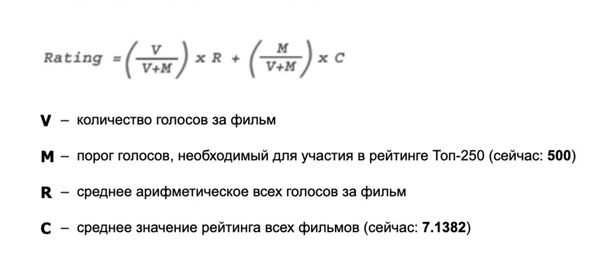

In [67]:
df

,Название,Голоса за все время,Грязный рейтинг,Голоса за год,Чистый рейтинг
1,Зеленая миля,756086,9.1,14090,9.1
2,Побег из Шоушенка,823914,9.1,11140,8.9
3,Список Шиндлера,406934,8.8,9509,8.9
4,Властелин колец: Возвращение короля,514349,8.6,12462,8.9
5,Властелин колец: Две крепости,506525,8.6,13718,8.8
...,...,...,...,...,...
246,Лицо со шрамом,200663,8.2,7882,8.0
247,Ученик чудовища,62016,8.1,5407,8.0
248,Русалочка,167430,8.2,2918,8.0
249,Афоня,147030,8.0,3906,8.0


<IPython.core.display.Javascript object>


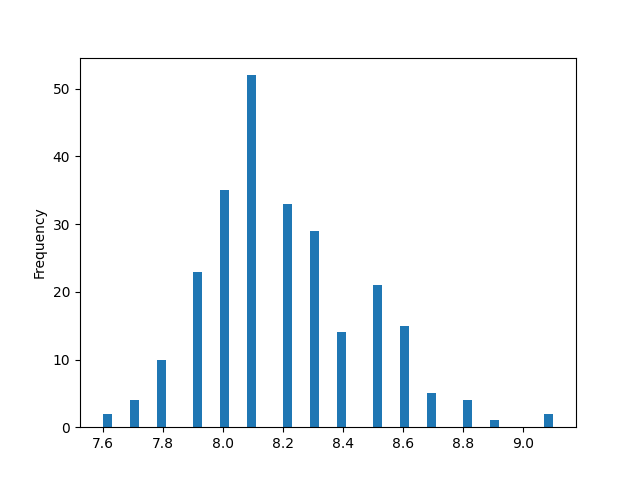

<AxesSubplot:ylabel='Frequency'>

In [72]:
fig = plt.figure()

df['Грязный рейтинг'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


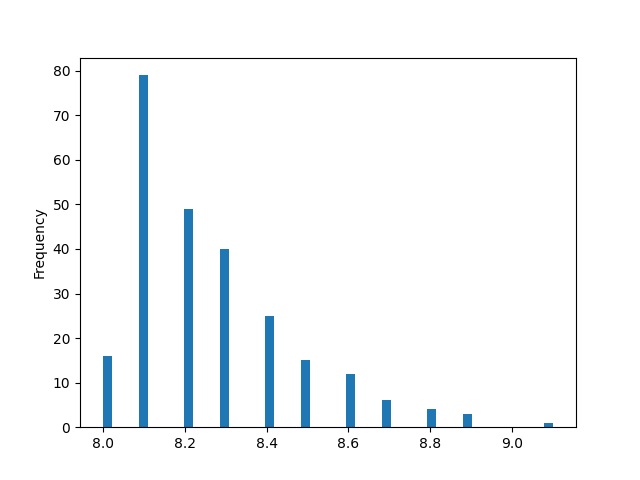

<AxesSubplot:ylabel='Frequency'>

In [77]:
fig = plt.figure()

df['Чистый рейтинг'].plot.hist(bins=50)

In [145]:

#    H0: образец имеет гауссово распределение.
#    H1: образец не имеет гауссовского распределения*



from scipy.stats import normaltest
data1 = df['Грязный рейтинг']
stat, p = normaltest(data1)
print(stat, p)

14.547732000724986 0.0006934260198730715


In [146]:
from scipy.stats import normaltest
data2 = df['Чистый рейтинг']
stat, p = normaltest(data2)
print(stat, p)

53.095186134735165 2.954791377576784e-12


<IPython.core.display.Javascript object>


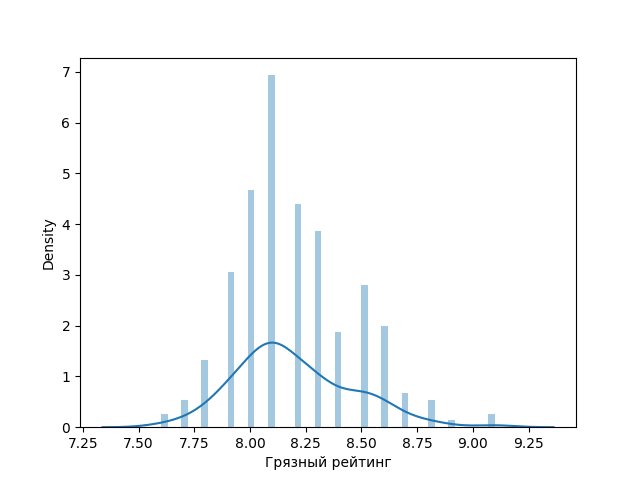

/home/alex/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Грязный рейтинг', ylabel='Density'>

In [86]:
fig = plt.figure()
sb.distplot(df['Грязный рейтинг'], bins=50)

<IPython.core.display.Javascript object>


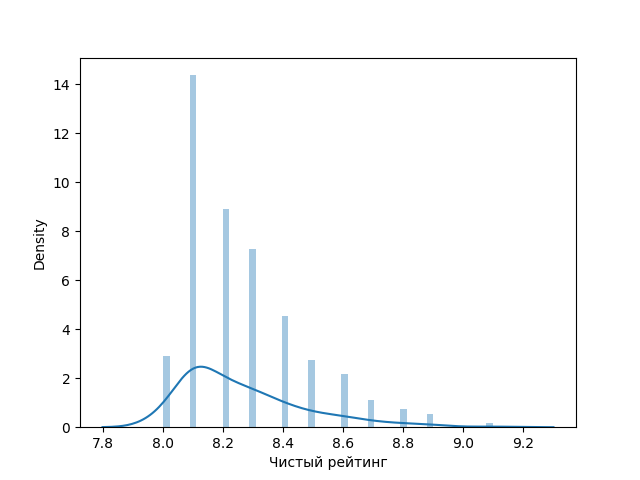

/home/alex/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Чистый рейтинг', ylabel='Density'>

In [79]:
fig = plt.figure()
sb.distplot(df['Чистый рейтинг'], bins=50)

In [82]:
df['Чистый рейтинг'].describe()

count    250.000000
mean       8.262400
std        0.203844
min        8.000000
25%        8.100000
50%        8.200000
75%        8.400000
max        9.100000
Name: Чистый рейтинг, dtype: float64

In [83]:
df['Грязный рейтинг'].describe()

count    250.000000
mean       8.196400
std        0.263181
min        7.600000
25%        8.000000
50%        8.100000
75%        8.300000
max        9.100000
Name: Грязный рейтинг, dtype: float64

In [89]:
df.head(30)


,Название,Голоса за все время,Грязный рейтинг,Голоса за год,Чистый рейтинг
1,Зеленая миля,756086,9.1,14090,9.1
2,Побег из Шоушенка,823914,9.1,11140,8.9
3,Список Шиндлера,406934,8.8,9509,8.9
4,Властелин колец: Возвращение короля,514349,8.6,12462,8.9
5,Властелин колец: Две крепости,506525,8.6,13718,8.8
6,Форрест Гамп,692724,8.9,14705,8.8
7,Властелин колец: Братство Кольца,563999,8.6,14842,8.8
8,1+1,1393777,8.8,14410,8.8
9,Криминальное чтиво,585626,8.6,14266,8.7
10,Король Лев,572277,8.8,10708,8.7


In [2]:
xlsx = pd.ExcelFile('output_text.xlsx')
df = pd.read_excel(xlsx)

In [3]:
df.set_index = range(1, 251)

In [4]:
df.columns

Index(['Unnamed: 0', 'Название', 'Голоса за все время', 'Грязный рейтинг',
       'Голоса за год', 'Чистый рейтинг'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.index = range(1, 251)

In [7]:
df

,Название,Голоса за все время,Грязный рейтинг,Голоса за год,Чистый рейтинг
1,Зеленая миля,756086,9.1,14090,9.1
2,Побег из Шоушенка,823914,9.1,11140,8.9
3,Список Шиндлера,406934,8.8,9509,8.9
4,Властелин колец: Возвращение короля,514349,8.6,12462,8.9
5,Властелин колец: Две крепости,506525,8.6,13718,8.8
...,...,...,...,...,...
246,Лицо со шрамом,200663,8.2,7882,8.0
247,Ученик чудовища,62016,8.1,5407,8.0
248,Русалочка,167430,8.2,2918,8.0
249,Афоня,147030,8.0,3906,8.0


In [8]:
from scipy import stats
import scipy

<IPython.core.display.Javascript object>


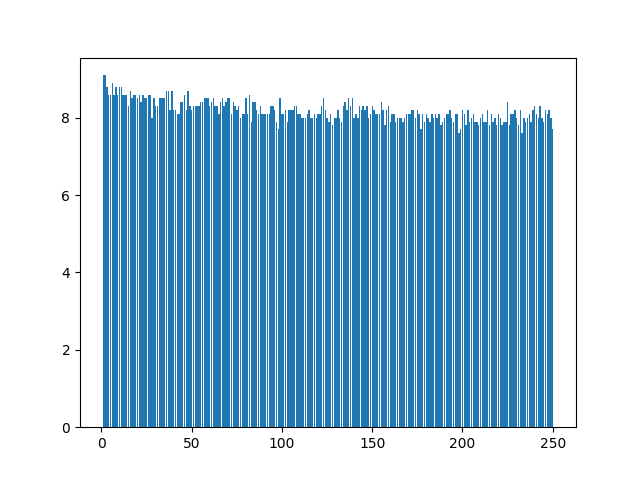

In [136]:
fig = plt.figure()
index = range(1, 251)
values = df['Грязный рейтинг']
plt.bar(index,values)
plt.show()

<IPython.core.display.Javascript object>


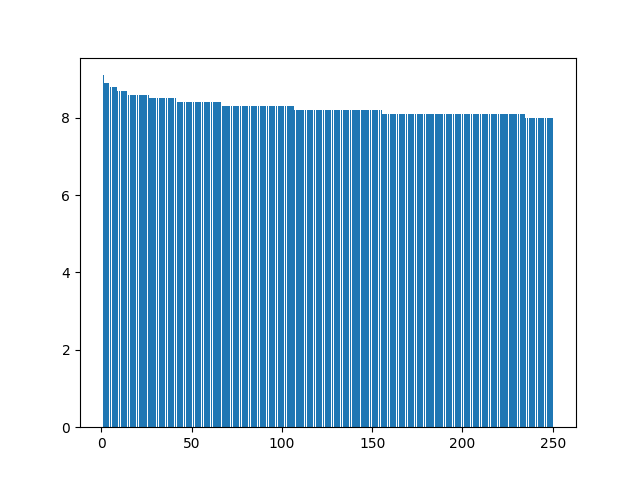

In [137]:
fig = plt.figure()
index = range(1, 251)
values = df['Чистый рейтинг']
plt.bar(index,values)
plt.show()

In [58]:
a = df['Грязный рейтинг'] - df['Чистый рейтинг']
a = a[a>0]
len(a)

60

In [47]:
a

2      0.2
6      0.1
10     0.1
11     0.1
16     0.1
27     0.1
36     0.2
37     0.2
39     0.2
46     0.2
48     0.3
57     0.1
58     0.1
59     0.1
62     0.1
67     0.2
69     0.1
70     0.2
71     0.2
73     0.1
80     0.2
82     0.3
84     0.1
85     0.1
99     0.2
107    0.1
108    0.1
122    0.1
123    0.3
134    0.1
135    0.2
137    0.3
138    0.1
139    0.3
143    0.1
145    0.1
147    0.1
150    0.1
155    0.2
156    0.1
158    0.1
159    0.2
172    0.1
173    0.1
175    0.1
193    0.1
200    0.1
203    0.1
214    0.1
225    0.3
229    0.1
232    0.1
237    0.1
239    0.2
240    0.3
241    0.1
243    0.3
246    0.2
247    0.1
248    0.2
dtype: float64

<IPython.core.display.Javascript object>


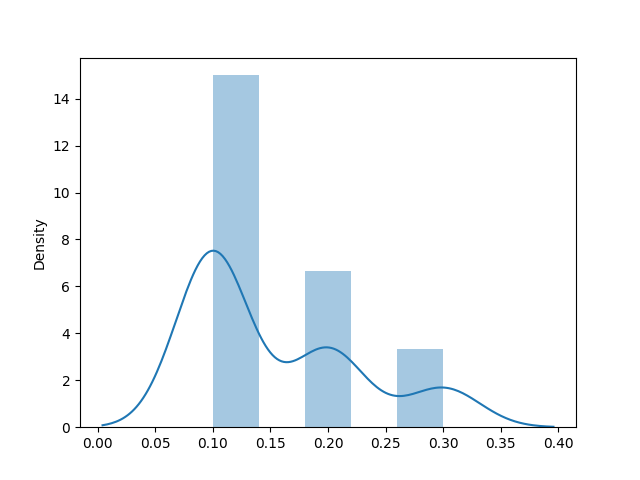

/home/alex/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

In [51]:
fig = plt.figure()
sb.distplot(a, bins=5)

In [31]:
# H0: 'Две связанные выборки из одного распределения'
# H1: 'Две связанные выборки из разных распределений'

from scipy.stats import wilcoxon

data1 = df['Чистый рейтинг']
data2 = df['Грязный рейтинг']

stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Такое же распределение (fail to reject H0)')
else:
    print('Распределения отличаются (reject H0)')

Statistics=5116.000, p=0.0000000360
Распределения отличаются (reject H0)


In [49]:
new_df = df['Чистый рейтинг'].to_frame().join(df['Грязный рейтинг'].to_frame())

In [50]:
new_df

,Чистый рейтинг,Грязный рейтинг
1,9.1,9.1
2,8.9,9.1
3,8.9,8.8
4,8.9,8.6
5,8.8,8.6
...,...,...
246,8.0,8.2
247,8.0,8.1
248,8.0,8.2
249,8.0,8.0


In [67]:
a = df['Грязный рейтинг'] - df['Чистый рейтинг']
a = a[a>0]
index = a.index
index

w = df['Чистый рейтинг'][index].to_frame().join(df['Грязный рейтинг'][index].to_frame())
w

,Чистый рейтинг,Грязный рейтинг
2,8.9,9.1
6,8.8,8.9
10,8.7,8.8
11,8.7,8.8
16,8.6,8.7
27,8.5,8.6
36,8.5,8.7
37,8.5,8.7
39,8.5,8.7
46,8.4,8.6


<IPython.core.display.Javascript object>


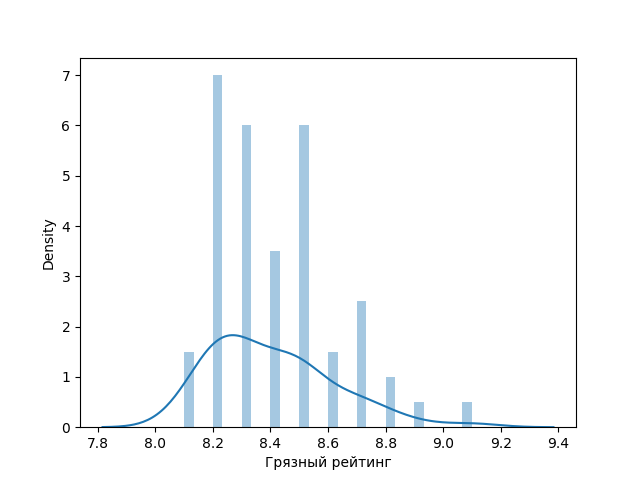

/home/alex/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Грязный рейтинг', ylabel='Density'>

In [73]:
fig = plt.figure()
sb.distplot(w['Грязный рейтинг'], bins=30)

<IPython.core.display.Javascript object>


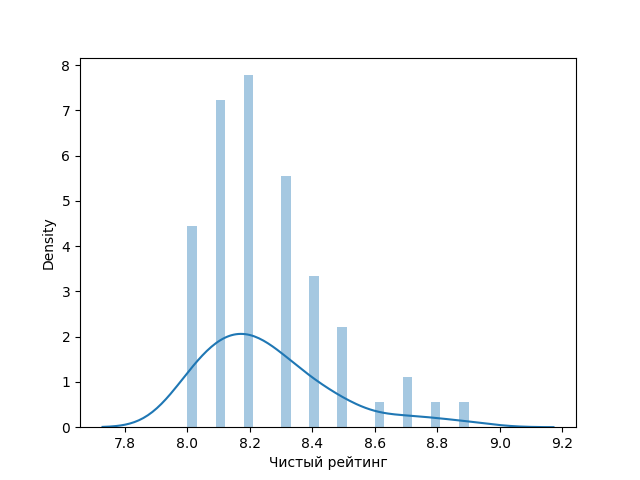

/home/alex/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Чистый рейтинг', ylabel='Density'>

In [74]:
fig = plt.figure()
sb.distplot(w['Чистый рейтинг'], bins=30)

<IPython.core.display.Javascript object>


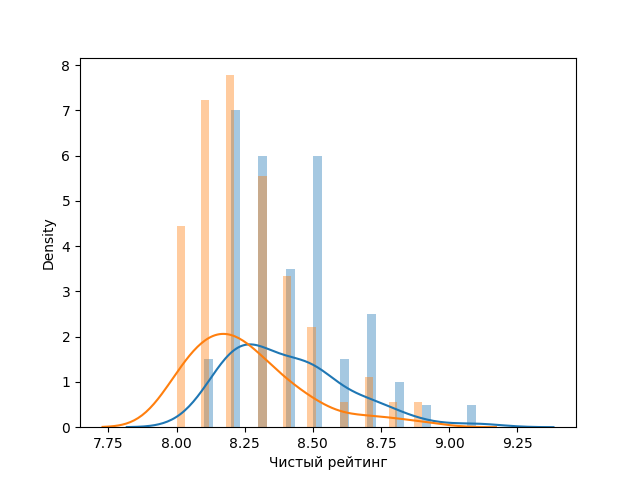

/home/alex/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Чистый рейтинг', ylabel='Density'>

In [75]:
fig = plt.figure()
sb.distplot(w['Грязный рейтинг'], bins=30)
sb.distplot(w['Чистый рейтинг'], bins=30)

<IPython.core.display.Javascript object>


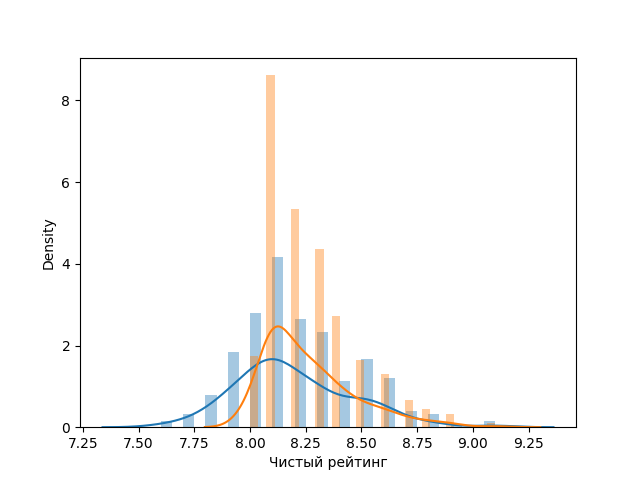

/home/alex/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Чистый рейтинг', ylabel='Density'>

In [140]:
fig = plt.figure()
sb.distplot(df['Грязный рейтинг'], bins=30)
sb.distplot(df['Чистый рейтинг'], bins=30)


#########################
Нулевая гипотеза формулируются следующим обра­зом: в состоянии изучаемого свойства нет значимых различий при первичном и вторичном измерениях. Альтернативная гипотеза: законы распределения величин X и У различны, т. е. состояния изучаемого свойства существенно раз­личны в одной и той же совокупности при первичном и вторичном измерениях этого свойства.

In [148]:
g_znak = data['Грязный рейтинг'] - data['Чистый рейтинг']
g_znak

2      0.2
6      0.1
10     0.1
11     0.1
16     0.1
27     0.1
36     0.2
37     0.2
39     0.2
46     0.2
48     0.3
57     0.1
58     0.1
59     0.1
62     0.1
67     0.2
69     0.1
70     0.2
71     0.2
73     0.1
80     0.2
82     0.3
84     0.1
85     0.1
99     0.2
107    0.1
108    0.1
122    0.1
123    0.3
134    0.1
135    0.2
137    0.3
138    0.1
139    0.3
143    0.1
145    0.1
147    0.1
150    0.1
155    0.2
156    0.1
158    0.1
159    0.2
172    0.1
173    0.1
175    0.1
193    0.1
200    0.1
203    0.1
214    0.1
225    0.3
229    0.1
232    0.1
237    0.1
239    0.2
240    0.3
241    0.1
243    0.3
246    0.2
247    0.1
248    0.2
dtype: float64

In [149]:
len(g_znak)

60

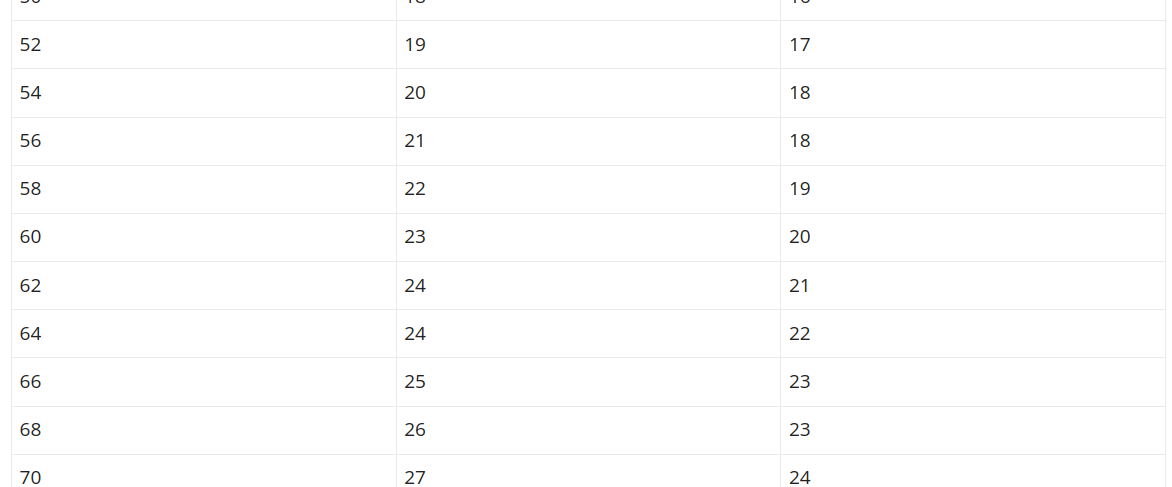

T_табл = 23. n = 60;
T_эмпир

T_эмпир > n - T_табл

Поэтому в соответствии с правилом принятия решения нулевая гипотеза отклоняется на уровне значимости 0,05 и принимается альтернативная гипотеза. Следовательно, существенная разница между двумя рейтингами есть.